# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Noah Waltmann

Datum: 19.11.2023

Gruppe: 13

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie gut kann man den Temperaturverlust einer Flüssigkeit mithilfe des Newtonschen Abkühlungsgesetzes prognostizieren.

## Versuchsaufbau und Durchführung

Aufbau:
In einem Gefäss befinden sich 200g heisses Wasser und ein Temperatursensor.
Weiterhin befindet sich in einiger Entfernung ein weiterer Temperatursensor, der die Umgebungstemperatur misst.

Durchführung:
Die Sensoren messen gleichzeitig jeweils die Temperatur der Umgebung und die Temperatur des Wassers. Dies geschieht über einen Zeitraum von c.a. zehn Minuten, sodass der Abkühlvorgang des Wassers quantifiziert werden kann.


<img src="figures/newton_image.jpg" width="800">

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
path = "/home/pi/calorimetry_home/data/newton/try_one/try_one.h5"

# DONE #

In [5]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
import h5py

 

with h5py.File(path) as f:

    #grop RawData is saved
    grp_raw = f["RawData"]

    author=f.attrs["authors"]
    created=f.attrs["created"]
    experiment=f.attrs["experiment"]
    group_number=f.attrs["group_number"]

    #initializing list uuids to be used later
    uuids=[]

    for uuid in grp_raw:    #for every sensor uuid is saved in list, datasets and metadata is saved in dict

        globals()["data_"+uuid]={} #initializing dicts for datasets to be associated to metadata
        uuids.append(uuid)     #uuid is saved

        globals()["data_"+uuid]["temps"]=grp_raw[uuid]["temperatures"][:]     #datasets are saved
        globals()["data_"+uuid]["time"]=grp_raw[uuid]["timestamps"][:]

        metadata={} #initializing metadata dict

        for attr_keys in grp_raw[uuid].attrs.keys():     #every attribute and its value are saved in metadata dict
            metadata[attr_keys]=grp_raw[uuid].attrs[attr_keys]

        metadata["unit_temps"]=grp_raw[uuid]["temperatures"].attrs["unit"]
        metadata["unit_time"]=grp_raw[uuid]["timestamps"].attrs["unit"]

        globals()["data_"+uuid]["metadata"]=metadata        #metadata is added to dict
# DONE #

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


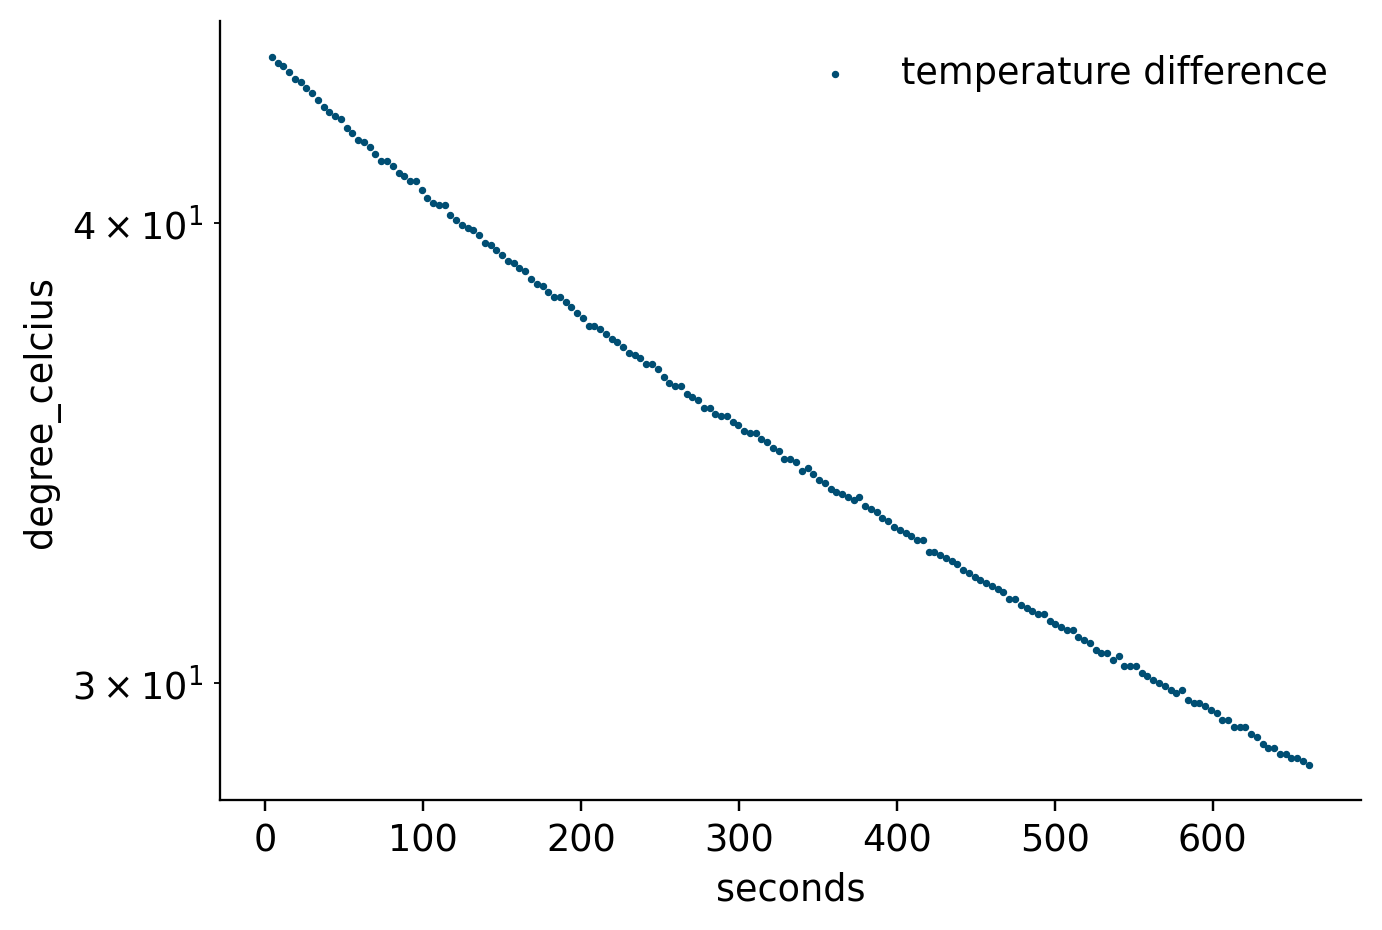

In [6]:
# TODO: Use the temperature and time data for plotting
import matplotlib.pyplot as plt
import numpy as np
temp_cup=globals()["data_"+uuids[0]]["temps"]    #temperatures are saved in variabels
temp_room=globals()["data_"+uuids[1]]["temps"]
time=globals()["data_"+uuids[1]]["time"]

if len(temp_cup)!=len(temp_room):       #tempreature datasets are brought to same length
    temp_cup=np.delete(temp_cup,-1)

#temperature difference is calculated
temp_diff=temp_cup-temp_room

#temperature difference is plotted
plt.scatter(time,temp_diff,label="temperature difference",s=2)

plt.yscale('log')
plt.xlabel(globals()["data_"+uuids[0]]["metadata"]["unit_time"])
plt.ylabel(globals()["data_"+uuids[0]]["metadata"]["unit_temps"])
plt.legend()
plt.savefig('newton_plot.svg')

# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [8]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
t_1 = temp_cup[0]

#average of room temperature (as in Skript)
t_2 = sum(temp_room)/len(temp_room)

#ln() of left side of equasion
log_temp_diff = np.log(temp_diff)

#calculate coefficients
coeffs = np.polyfit(time, log_temp_diff-np.log(t_1-t_2), 1)

#K is first of coefficients
K = coeffs[0]

#calculating predicted temperature for end of measurement
t = time[-1]
t_end_calc =(t_1-t_2)*np.exp(K*t) + t_2

#measured temperature at the end of experiment
t_end_meas = temp_cup[-1]

# DONE #

#### (iV) Ergebnis

In [10]:
# TODO: Print result
print("Experiment information: author ",author," ; created ",created," ; experiment ",experiment," ; group number ",group_number)
print("The heat transfer coefficient is ", K, "1/s")
print("The temperature at the end of the measurement is ",t_end_meas," degree celsius.")
print("The temperature that is calculated for the end of the experiment is ",t_end_calc," degree celsius.")

# DONE #

Experiment information: author  Noah Waltmann  ; created  19-11-2023, 19:25:00  ; experiment  Kalorimetrie Kuechentisch  ; group number  13
The heat transfer coefficient is  -0.0006618632549131219 1/s
The temperature at the end of the measurement is  51.1875  degree celsius.
The temperature that is calculated for the end of the experiment is  51.86513117610027  degree celsius.


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Es war möglich den Abkühlvorgang zu quantifizieren und eine zufriedenstellende Prognose für die Endtemperatur der Messung zu prognostizieren. 

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Bei diesem Versuch habe ich zum ersten mal eine Messung durchgeführt und ausgewertet, die ein Naturgesetz prüft. Dabei habe ich gesehen, dass es möglich ist Messprogramme, die Daten und Metadaten strukturiert verarbeiten, auf verschiedene Probleme anzuwenden und sich so Arbeit zu ersparen, aber gleichzeitig qualitativ hochwertige Messdaten zu erzeugen.